# Codigos para obtener el resultado de mis estudios

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
import xgboost as xgb

In [5]:
df = pd.read_csv('C:/Users/GINA/Downloads/student-mat.csv')
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
# Verificar datos faltantes
missing_data = df.isnull().sum()

# Porcentaje de datos faltantes
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_summary = pd.DataFrame({"Total missing": missing_data, "Percentage": missing_percentage})
missing_summary.sort_values(by="Percentage", ascending=False)


,Total missing,Percentage
school,0,0.0
paid,0,0.0
G2,0,0.0
G1,0,0.0
absences,0,0.0
health,0,0.0
Walc,0,0.0
Dalc,0,0.0
goout,0,0.0
freetime,0,0.0


In [7]:
# Verificar datos faltantes
missing_data = df.isnull().sum()

# Porcentaje de datos faltantes
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_summary = pd.DataFrame({"Total missing": missing_data, "Percentage": missing_percentage})
missing_summary.sort_values(by="Percentage", ascending=False)


,Total missing,Percentage
school,0,0.0
paid,0,0.0
G2,0,0.0
G1,0,0.0
absences,0,0.0
health,0,0.0
Walc,0,0.0
Dalc,0,0.0
goout,0,0.0
freetime,0,0.0


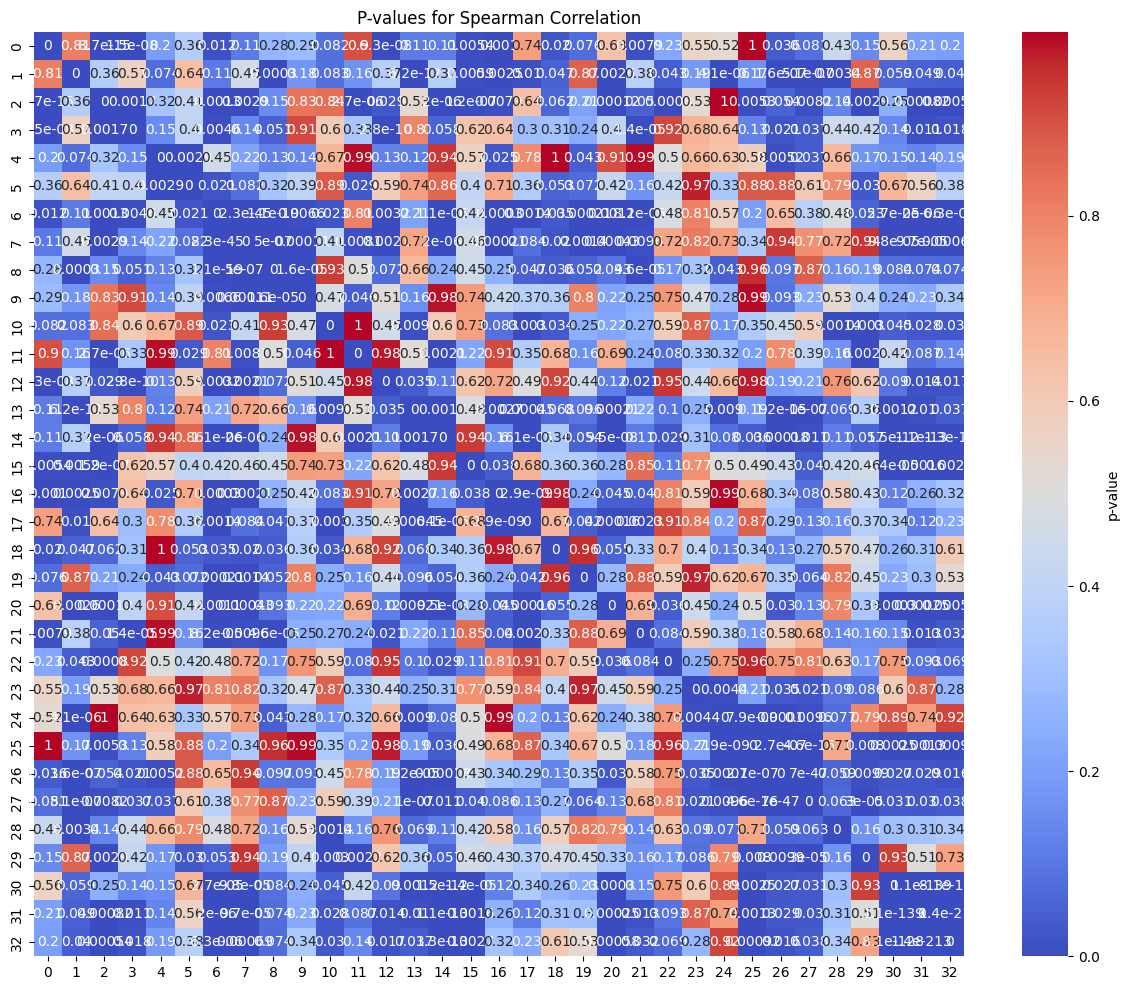

In [8]:
# Calcular la correlación de Spearman y p-values
correlation, p_values = stats.spearmanr(df)

# Crear un heatmap con los p-values
plt.figure(figsize=(15, 12))
sns.heatmap(p_values, annot=True, fmt=".2g", cmap='coolwarm', cbar_kws={'label': 'p-value'})
plt.title("P-values for Spearman Correlation")
plt.show()

se realiza la matrix para identificar los p-valores de todas mis variables y visualizar su relacion. 



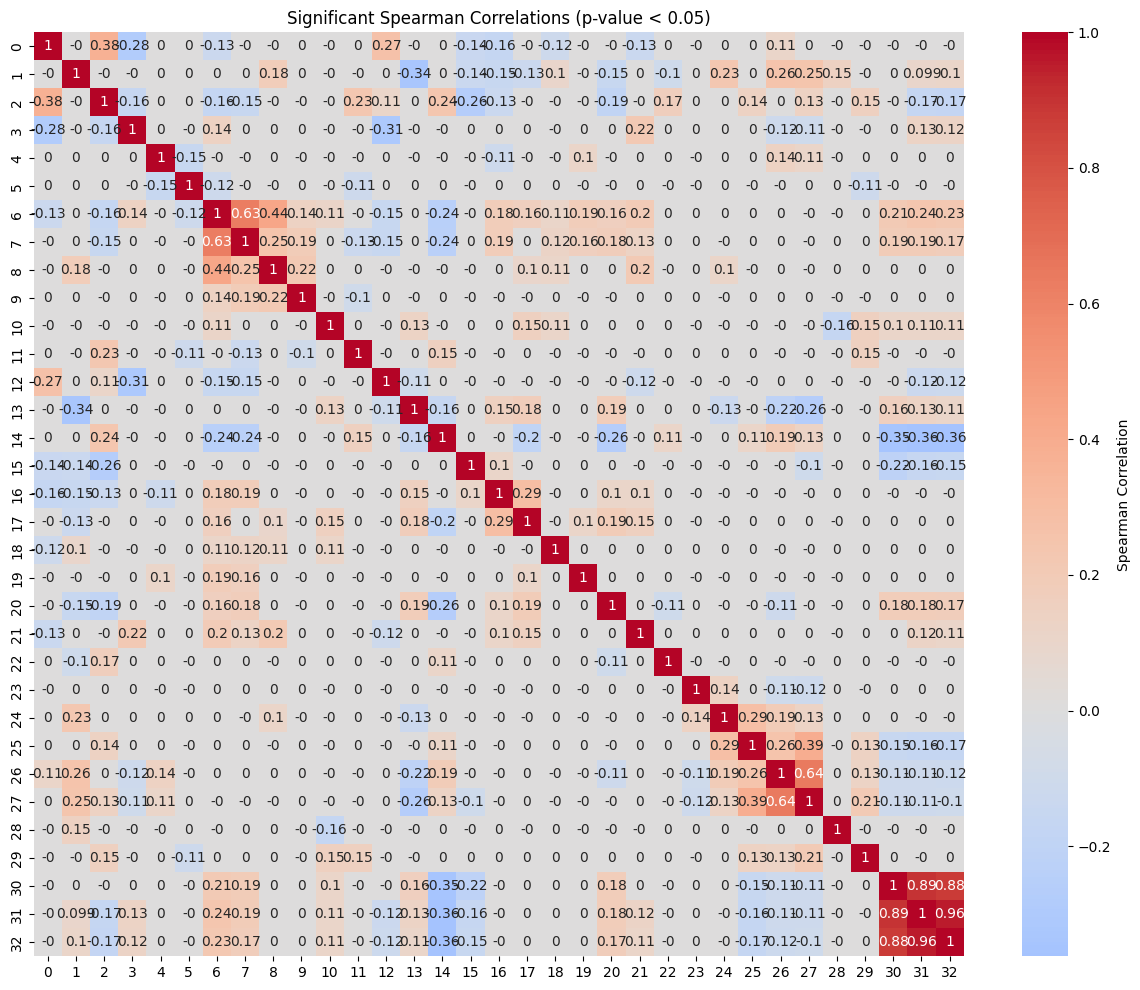

In [9]:
# Filtrar las correlaciones donde p-value < 0.05
significant_corr = correlation * (p_values < 0.05)

# Crear un heatmap con las correlaciones significativas
plt.figure(figsize=(15, 12))
sns.heatmap(significant_corr, annot=True, fmt=".2g", cmap='coolwarm', center=0, cbar_kws={'label': 'Spearman Correlation'})
plt.title("Significant Spearman Correlations (p-value < 0.05)")
plt.show()

El codigo anterior filtra las correlaciones donde el p-value es menor que 0.05 y crea un mapa de calor con las correlaciones significativas con el fin de identificar relaciones estadísticamente significativas entre mis variables.

In [11]:
# Seleccionar solo las columnas numéricas
columnas_numericas = df.select_dtypes(include=['number'])

# Calcular la correlación de Spearman entre las columnas numéricas
correlacion_spearman = columnas_numericas.corr(method='spearman')


In [12]:
correlacion_spearman

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
age,1.000000,-0.161294,-0.149596,0.109804,0.031557,0.236464,0.031380,0.000302,0.140131,0.097073,0.132799,-0.075150,0.149276,-0.057630,-0.167622,-0.173438
Medu,-0.161294,1.000000,0.631577,-0.147849,0.063498,-0.242373,0.012361,0.028493,0.064954,0.022729,-0.044332,-0.035686,0.097562,0.209662,0.236354,0.225036
Fedu,-0.149596,0.631577,1.000000,-0.154454,0.018429,-0.236616,0.011400,-0.017132,0.047961,0.003994,-0.014486,0.018113,0.003568,0.194737,0.194844,0.170049
traveltime,0.109804,-0.147849,-0.154454,1.000000,-0.105969,0.079917,-0.038656,-0.022279,-0.001430,0.066477,0.063654,-0.015452,-0.025061,-0.085501,-0.123795,-0.120530
studytime,0.031557,0.063498,0.018429,-0.105969,1.000000,-0.157633,0.058141,-0.131321,-0.065979,-0.217904,-0.264021,-0.091497,-0.046180,0.162286,0.129160,0.105170
failures,0.236464,-0.242373,-0.236616,0.079917,-0.157633,1.000000,-0.051389,0.088058,0.105419,0.187492,0.127912,0.079688,0.096028,-0.346052,-0.362357,-0.361224
famrel,0.031380,0.012361,0.011400,-0.038656,0.058141,-0.051389,1.000000,0.143142,0.063549,-0.106338,-0.116060,0.085341,-0.086577,0.026433,0.008165,0.054977
freetime,0.000302,0.028493,-0.017132,-0.022279,-0.131321,0.088058,0.143142,1.000000,0.285182,0.194223,0.130246,0.088975,0.013397,0.006973,-0.016765,-0.004994
goout,0.140131,0.064954,0.047961,-0.001430,-0.065979,0.105419,0.063549,0.285182,1.000000,0.255146,0.393333,-0.018541,0.133280,-0.151636,-0.160985,-0.166119
Dalc,0.097073,0.022729,0.003994,0.066477,-0.217904,0.187492,-0.106338,0.194223,0.255146,1.000000,0.639906,0.095139,0.129651,-0.111438,-0.110086,-0.120944


Los datos anteriores muestran las correlaciones entre diferentes variables. Cada número  representa el coeficiente de correlación entre dos variables específicas. Aquí hay una interpretación general de algunas de las correlaciones notables:


-Salud (health):

Tiene una correlación negativa débil con las notas (G1, G2 y G3).

-Ausencias (absences):

Tiene una correlación positiva moderada con el número de fallas escolares (failures).
Tiene una correlación negativa débil con las notas (G1, G2 y G3).

-Notas (G1, G2 y G3):

Las tres notas tienen correlaciones positivas fuertes entre sí, lo que indica que los estudiantes que obtienen buenas notas en un período tienden a obtener buenas notas en los períodos siguientes.

In [13]:
df1 = df.drop(columns=['G1', 'G2'])

In [14]:
len(df1.G3)

395

In [15]:

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [16]:
# Escalamos los datos ya que tanto PCA como MDS se benefician del escalado
scaler = StandardScaler()

In [17]:
# Codificar las variables categóricas usando codificación one-hot
df1_encoded = pd.get_dummies(df1, drop_first=True)

# Escalar los datos codificados
df1_scaled_encoded = scaler.fit_transform(df1_encoded)

pca = PCA()
df1_pca_encoded = pca.fit_transform(df1_scaled_encoded)
num_components_encoded = sum(pca.explained_variance_ > 1)
df1_pca_encoded = df1_pca_encoded[:, :num_components_encoded]

In [18]:
# Re-definir MDS y realizar la transformación
mds = MDS(n_components=3, random_state=42)
df1_mds_encoded = mds.fit_transform(df1_scaled_encoded)

df1_pca_encoded.shape, df1_mds_encoded.shape

((395, 17), (395, 3))

In [19]:
# Seleccionar solo las columnas numéricas de df1
df1_numeric = df1.select_dtypes(include=['float64', 'int64'])

# Escalar las variables numéricas
df1_numeric_scaled = scaler.fit_transform(df1_numeric)

# Aplicar PCA
df1_pca_numeric = pca.fit_transform(df1_numeric_scaled)
num_components_numeric = sum(pca.explained_variance_ > 1)
df1_pca_numeric = df1_pca_numeric[:, :num_components_numeric]

df1_pca_numeric.shape

(395, 6)

In [20]:
# Separar la variable objetivo
y = df1["G3"]

# Dividir el dataframe df1_pca_encoded en conjuntos de entrenamiento y prueba
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(df1_pca_encoded, y, test_size=0.2, random_state=42)

# Dividir el dataframe df1_mds_encoded en conjuntos de entrenamiento y prueba
X_train_mds, X_test_mds, y_train_mds, y_test_mds = train_test_split(df1_mds_encoded, y, test_size=0.2, random_state=42)

(X_train_pca.shape, X_test_pca.shape), (X_train_mds.shape, X_test_mds.shape)

(((316, 17), (79, 17)), ((316, 3), (79, 3)))

El primer conjunto de datos tiene 395 filas y 17 columnas, lo que significa que contiene 395 muestras (instancias) y cada muestra tiene 17 características.

Esta notación es comúnmente utilizada para describir la forma o dimensiones de los datos en el contexto de análisis de datos y aprendizaje automático. Las dimensiones de los datos son importantes porque te dicen cuántas muestras tienes y cuántas características (variables) están presentes en tus datos, lo que es esencial para realizar análisis y modelado de datos.

MODELOS DE ENSAMBLE

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Crear y entrenar el modelo
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_pca, y_train_pca)

RandomForestRegressor(random_state=42)

MODELOS LINEALES + BOOSTING

In [22]:
from sklearn.linear_model import LinearRegression
import xgboost as xgb

# Entrenar el modelo de regresión lineal
lr = LinearRegression()
lr.fit(X_train_pca, y_train_pca)

# Obtener las predicciones del modelo lineal y usarlas como nueva característica
X_train_pca_with_predictions = np.column_stack((X_train_pca, lr.predict(X_train_pca)))

# Entrenar XGBoost con la nueva característica
xgbr = xgb.XGBRegressor(objective ='reg:squarederror')
xgbr.fit(X_train_pca_with_predictions, y_train_pca)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

MODELOS DE STACKING

In [23]:
from sklearn.ensemble import StackingRegressor

# Definir los modelos base y el meta-modelo
base_models = [
    ('lr', LinearRegression()),
    ('xgb', xgb.XGBRegressor(objective ='reg:squarederror'))
]
stacked_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Entrenar el modelo de stacking
stacked_model.fit(X_train_pca, y_train_pca)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                  final_estimator=LinearRegression())

BAGGING REGRESSOR

In [24]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Definir y entrenar el modelo
bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging.fit(X_train_pca, y_train_pca)

BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100,
                 random_state=42)

VOTING ENSAMBLE

In [25]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Definir los modelos individuales
model1 = LinearRegression()
model2 = xgb.XGBRegressor(objective ='reg:squarederror')
model3 = SVR(kernel='linear')

# Crear y entrenar el VotingRegressor
voting = VotingRegressor(estimators=[('lr', model1), ('xgb', model2), ('svr', model3)])
voting.fit(X_train_pca, y_train_pca)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('xgb',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('svr', SVR(kernel='linear'))])

In [26]:
from sklearn.linear_model import Lasso, Ridge

MÉTRICAS

Las métricas son medidas cuantitativas que se utilizan para evaluar el rendimiento o la calidad de un modelo de machine learning en función de su capacidad para hacer predicciones precisas en un conjunto de datos. Estas métricas proporcionan información sobre cómo se desempeña el modelo y pueden variar según el tipo de problema de machine learning que se esté abordando (clasificación, regresión, agrupamiento, etc.)

In [27]:
# Definir los modelos
models = {
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'LR + XGBoost': StackingRegressor(estimators=[('lr', LinearRegression()), ('xgb', xgb.XGBRegressor(objective ='reg:squarederror'))], final_estimator=LinearRegression()),
    'Bagging': BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42),
    'Voting': VotingRegressor(estimators=[('lr', LinearRegression()), ('xgb', xgb.XGBRegressor(objective ='reg:squarederror')), ('svr', SVR(kernel='linear'))]),
    'XGBoost': xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)
}

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_regression_model(model, X_train, y_train, X_test, y_test):
    # Hacer predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular métricas
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    metrics = {
        'Test MSE': test_mse,
        'Test RMSE': test_rmse,
        'Test MAE': test_mae,
        'Test R^2': test_r2
    }

    return metrics

# Luego, para cada modelo:
metrics_data = {}
for name, model in models.items():
    model.fit(X_train_pca, y_train_pca)  # Asegurarse de que el modelo esté entrenado
    metrics_data[name] = evaluate_regression_model(model, X_train_pca, y_train_pca, X_test_pca, y_test_pca)

# Convertir a DataFrame
metrics_df = pd.DataFrame(metrics_data).T

In [29]:
metrics_df

,Test MSE,Test RMSE,Test MAE,Test R^2
Lasso Regression,12.245160,3.499309,2.793225,0.402822
Ridge Regression,8.181932,2.860408,2.253095,0.600980
Random Forest,10.139343,3.184234,2.433291,0.505520
LR + XGBoost,7.821984,2.796781,2.125477,0.618534
Bagging,10.037454,3.168194,2.427722,0.510489
Voting,7.929648,2.815963,2.159941,0.613283
XGBoost,10.061661,3.172012,2.362322,0.509308


Cada fila en la tabla representa un modelo diferente, y las métricas se utilizan para evaluar el rendimiento de ese modelo en un conjunto de prueba. Se hace comparacion de estas métricas entre modelos para determinar cuál de ellos se desempeña mejor en términos de la métrica específica  (por ejemplo, menor MSE o mayor R^2). 

El modelo de mejor rendimiento es el modelo "LR + XGBoost" tiene las siguientes métricas de evaluación en el conjunto de prueba:

Test MSE (Mean Squared Error): 7.821984
Test RMSE (Root Mean Squared Error): 2.796781
Test MAE (Mean Absolute Error): 2.125477
Test R^2 (Coeficiente de determinación): 0.618534
Estas métricas indican el rendimiento del modelo en la tarea específica para la que fue entrenado y evaluado. Aquí hay una breve interpretación de estas métricas:

El MSE de 7.821984 sugiere que, en promedio, las predicciones del modelo tienen un error cuadrático medio de aproximadamente 7.82 unidades cuadradas en relación con los valores reales.

El RMSE de 2.796781 es la raíz cuadrada del MSE y proporciona una medida de la magnitud promedio de los errores en la misma unidad que la variable objetivo. Un RMSE más bajo es mejor.

El MAE de 2.125477 es el error absoluto medio y representa el valor absoluto promedio de los errores entre las predicciones y los valores reales. Cuanto menor sea el MAE, mejor será el rendimiento del modelo.

El R^2 de 0.618534 es una medida de cuánta variación en la variable objetivo es explicada por el modelo. Un R^2 más alto indica que el modelo explica una mayor proporción de la variación en los datos.

Asi, el modelo "LR + XGBoost" parece tener un buen rendimiento en términos de estas métricas de evaluación. El bajo MSE, RMSE y MAE, junto con el R^2 relativamente alto, sugieren que el modelo es capaz de hacer predicciones precisas en el conjunto de prueba. 

In [30]:
# Luego, para cada modelo:
metrics_data = {}
for name, model in models.items():
    model.fit(X_train_mds, y_train_mds)  # Asegurarse de que el modelo esté entrenado
    metrics_data[name] = evaluate_regression_model(model, X_train_mds, y_train_mds, X_test_mds, y_test_mds)

# Convertir a DataFrame
metrics_df_mds = pd.DataFrame(metrics_data).T

In [31]:
metrics_df_mds

,Test MSE,Test RMSE,Test MAE,Test R^2
Lasso Regression,17.801416,4.219172,3.459335,0.131852
Ridge Regression,17.919273,4.233116,3.439320,0.126104
Random Forest,21.052832,4.588336,3.656835,-0.026715
LR + XGBoost,19.389640,4.403367,3.569389,0.054397
Bagging,21.376982,4.623525,3.663797,-0.042523
Voting,19.103637,4.370771,3.502806,0.068345
XGBoost,26.914561,5.187925,4.149692,-0.312582


En general, un menor MSE, RMSE y MAE, junto con un R^2 más cercano a 1, indican un mejor rendimiento del modelo. Basándonos en estas métricas, los modelos "Lasso Regression" y "Ridge Regression" tienen un rendimiento similar en términos de MSE, RMSE y MAE, y tienen valores de R^2 positivos. "Voting" y "LR + XGBoost" también tienen valores de R^2 positivos y un buen rendimiento en términos de MAE y RMSE. "Random Forest", "Bagging" y "XGBoost" tienen valores de R^2 negativos, lo que sugiere que estos modelos no están ajustando bien los datos en comparación con los otros modelos.

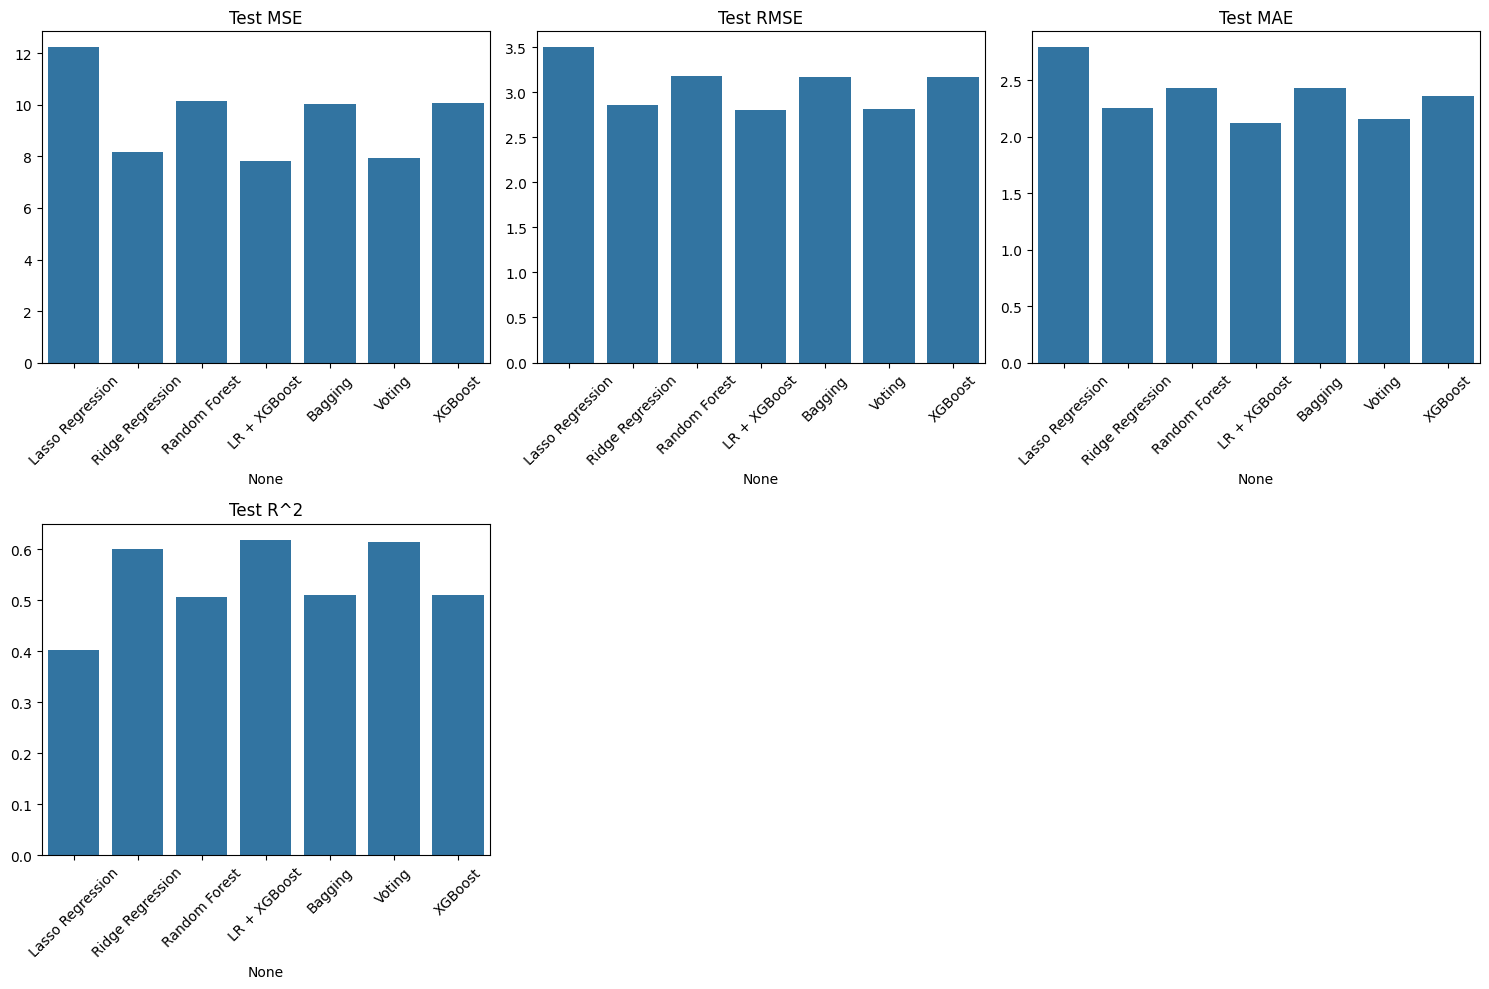

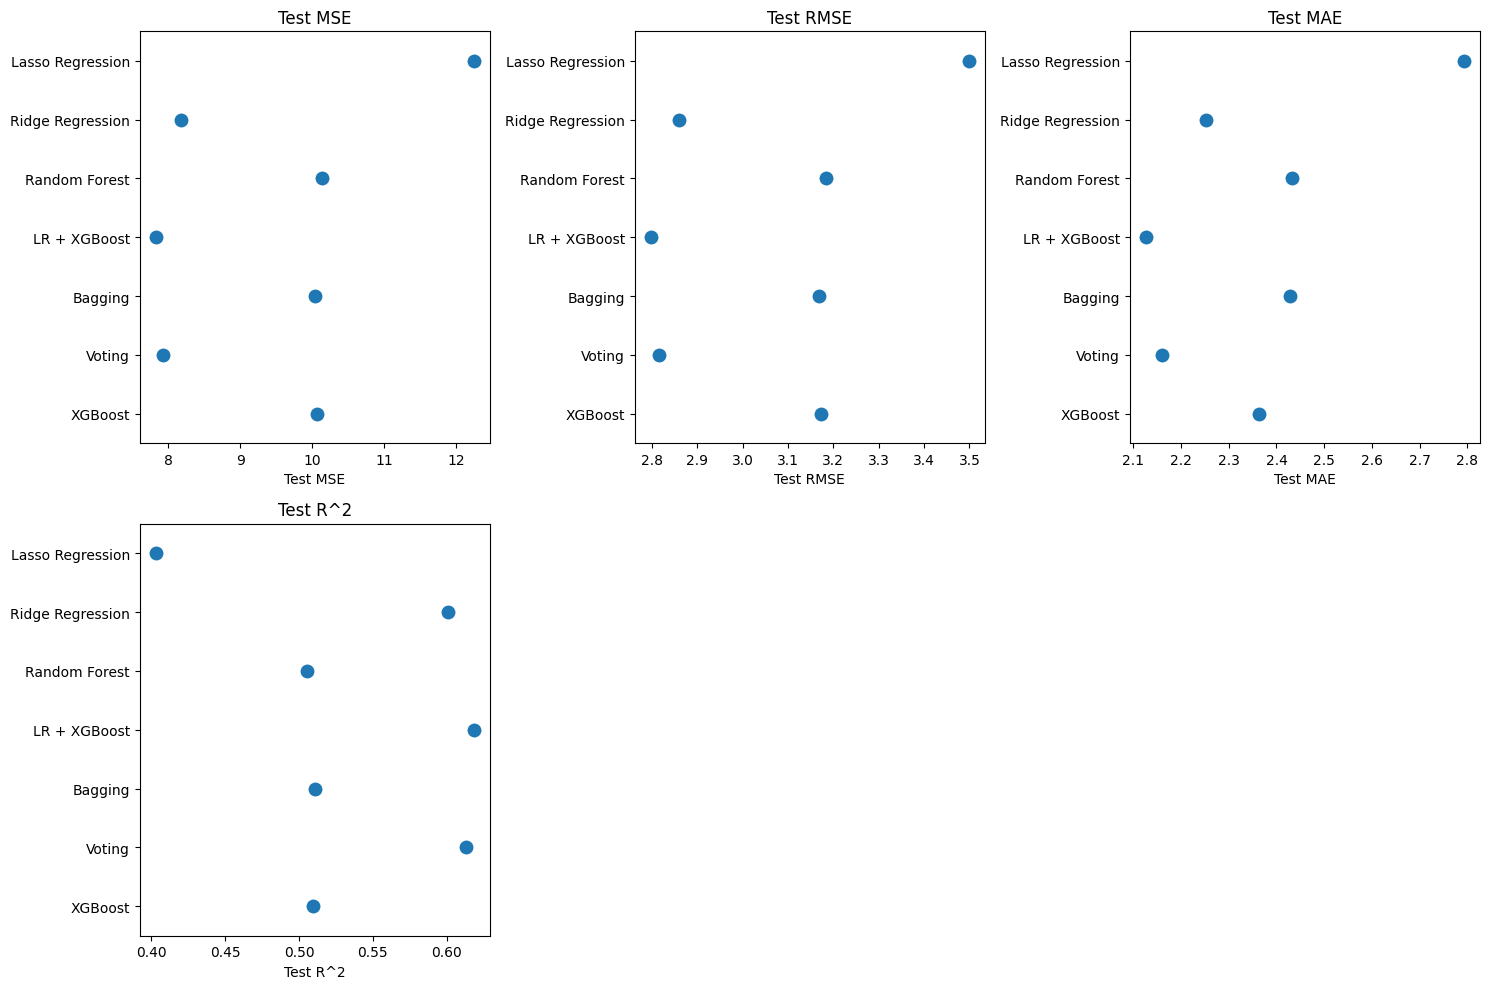

In [32]:
# Gráfico de barras para visualizar métricas
plt.figure(figsize=(15, 10))

# Subplots para cada métrica
for idx, metric in enumerate(metrics_df.columns, 1):
    plt.subplot(2, 3, idx)
    sns.barplot(x=metrics_df.index, y=metric, data=metrics_df)
    plt.title(metric)
    plt.ylabel('')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

# Gráficos de dispersión (dot plots) para visualizar métricas
plt.figure(figsize=(15, 10))

# Subplots para cada métrica
for idx, metric in enumerate(metrics_df.columns, 1):
    plt.subplot(2, 3, idx)
    sns.stripplot(x=metric, y=metrics_df.index, data=metrics_df, size=10, orient='h')
    plt.title(metric)
    plt.ylabel('')
    plt.tight_layout()

plt.show()

En los gráficos de barras, cada barra representa el valor de una métrica de evaluación (por ejemplo, Test MSE, Test RMSE, Test MAE, Test R^2) para un modelo específico.

se puede comparar visualmente la altura de las barras para cada métrica. Cuanto más baja sea la barra, mejor es el rendimiento del modelo en esa métrica.

Asi, podemos deducir que para MSE hay tres modelos que se igualan:LR + XGBoost, voting y lasso regression al igual que para RMSE Y MAE. 

Pero para un mayor r cuadrado solo dos modelos se igualan;LR + XGBoost y voting. 

OPTIMIZADOS

los modelos optimizados son aquellos que se han ajustado cuidadosamente para obtener el mejor rendimiento en términos de las métricas de evaluación específicas de un problema de aprendizaje automático. La optimización de modelos es una parte crucial del proceso de desarrollo de modelos de machine learning para garantizar que puedan realizar predicciones precisas en datos nuevos y no vistos.


GRID SEARCH



rigde

In [33]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
ridge_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'fit_intercept': [True, False],
 #   'normalize': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

ridge_grid_search = GridSearchCV(ridge, ridge_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_grid_search.fit(X_train_pca, y_train_pca)
ridge_grid_best_params = ridge_grid_search.best_params_
ridge_grid_best_score = ridge_grid_search.best_score_

lasso

In [34]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'fit_intercept': [True, False],
 #   'normalize': [True, False],
    'precompute': [True, False],
    'warm_start': [True, False],
    'positive': [True, False]
}

lasso_grid_search = GridSearchCV(lasso, lasso_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
lasso_grid_search.fit(X_train_pca, y_train_pca)
lasso_grid_best_params = lasso_grid_search.best_params_
lasso_grid_best_score = lasso_grid_search.best_score_

Random Forest Regressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()
rf_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_grid_search = GridSearchCV(random_forest, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train_pca, y_train_pca)
rf_grid_best_params = rf_grid_search.best_params_
rf_grid_best_score = rf_grid_search.best_score_

Bagging Regressor

In [36]:
from sklearn.ensemble import BaggingRegressor

bagging = BaggingRegressor()
bagging_param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

bagging_grid_search = GridSearchCV(bagging, bagging_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
bagging_grid_search.fit(X_train_pca, y_train_pca)
bagging_grid_best_params = bagging_grid_search.best_params_
bagging_grid_best_score = bagging_grid_search.best_score_

XGBoost

In [37]:
import xgboost as xgb

xgboost = xgb.XGBRegressor(objective ='reg:squarederror')
xgboost_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

xgboost_grid_search = GridSearchCV(xgboost, xgboost_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
xgboost_grid_search.fit(X_train_pca, y_train_pca)
xgboost_grid_best_params = xgboost_grid_search.best_params_
xgboost_grid_best_score = xgboost_grid_search.best_score_

LR + XGBOOST

In [38]:
%%time
# Definir el Stacking Regressor con estimadores base
stacking_regressor = StackingRegressor(estimators=[('lr', LinearRegression()), ('xgb', xgb.XGBRegressor(objective ='reg:squarederror'))])

# Definir el espacio de parámetros
stacking_param_grid = {
    'xgb__n_estimators': [50, 100, 150],
    'xgb__max_depth': [3, 5, 7, 10],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.3],
    'xgb__gamma': [0, 0.1, 0.2],
    'xgb__subsample': [0.8, 1],
    'xgb__colsample_bytree': [0.8, 1],
    'lr__fit_intercept': [True, False],
   # 'lr__normalize': [True, False]
}

stacking_grid_search = GridSearchCV(stacking_regressor, stacking_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
stacking_grid_search.fit(X_train_pca, y_train_pca)
stacking_grid_best_params = stacking_grid_search.best_params_
stacking_grid_best_score = stacking_grid_search.best_score_

CPU times: total: 1min 44s
Wall time: 2h 18min 57s


RANDOM SEARCH

La búsqueda aleatoria (Random Search) es una técnica utilizada en el ajuste de hiperparámetros de modelos de machine learning. Se utiliza para encontrar la combinación óptima de hiperparámetros al explorar de manera aleatoria un espacio de búsqueda de hiperparámetros predefinidos. A diferencia de la búsqueda de cuadrícula (Grid Search), que explora todas las combinaciones posibles de hiperparámetros, la búsqueda aleatoria selecciona conjuntos de hiperparámetros de forma aleatoria para su evaluación.


ridge

In [39]:
from sklearn.model_selection import RandomizedSearchCV

ridge_random_search = RandomizedSearchCV(ridge,
                                         ridge_param_grid, n_iter=20,
                                         cv=5, scoring='neg_mean_squared_error',
                                         n_jobs=-1, random_state=42)
ridge_random_search.fit(X_train_pca, y_train_pca)
ridge_random_best_params = ridge_random_search.best_params_
ridge_random_best_score = ridge_random_search.best_score_

lasso

In [40]:
lasso_random_search = RandomizedSearchCV(lasso, lasso_param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
lasso_random_search.fit(X_train_pca, y_train_pca)
lasso_random_best_params = lasso_random_search.best_params_
lasso_random_best_score = lasso_random_search.best_score_

Random Forest Regressor

In [41]:
rf_random_search = RandomizedSearchCV(random_forest, rf_param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
rf_random_search.fit(X_train_pca, y_train_pca)
rf_random_best_params = rf_random_search.best_params_
rf_random_best_score = rf_random_search.best_score_

Bagging Regressor

In [42]:
bagging_random_search = RandomizedSearchCV(bagging, bagging_param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
bagging_random_search.fit(X_train_pca, y_train_pca)
bagging_random_best_params = bagging_random_search.best_params_
bagging_random_best_score = bagging_random_search.best_score_


XGBoost

In [43]:
xgboost_random_search = RandomizedSearchCV(xgboost, xgboost_param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
xgboost_random_search.fit(X_train_pca, y_train_pca)
xgboost_random_best_params = xgboost_random_search.best_params_
xgboost_random_best_score = xgboost_random_search.best_score_

LR + XGBOOST

In [44]:
stacking_random_search = RandomizedSearchCV(stacking_regressor, stacking_param_grid, n_iter=20, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
stacking_random_search.fit(X_train_pca, y_train_pca)
stacking_random_best_params = stacking_random_search.best_params_
stacking_random_best_score = stacking_random_search.best_score_

MÉTRICAS

In [45]:
def evaluate_test_metrics(model, X_test, y_test):
    """Evalúa un modelo de regresión y devuelve las métricas de test."""
    y_test_pred = model.predict(X_test)

    metrics = {
        'Test MSE': mean_squared_error(y_test, y_test_pred),
        'Test RMSE': mean_squared_error(y_test, y_test_pred, squared=False),
        'Test MAE': mean_absolute_error(y_test, y_test_pred),
        'Test R^2': r2_score(y_test, y_test_pred)
    }

    return metrics

In [46]:
# Evaluar modelos ajustados con Grid Search
metrics_data_grid = {
    'Grid Lasso Regression': evaluate_test_metrics(lasso_grid_search, X_test_pca, y_test_pca),
    'Grid Ridge Regression': evaluate_test_metrics(ridge_grid_search, X_test_pca, y_test_pca),
    'Grid Random Forest': evaluate_test_metrics(rf_grid_search, X_test_pca, y_test_pca),
    'Grid Bagging Ensamble': evaluate_test_metrics(bagging_grid_search, X_test_pca, y_test_pca),
    'Grid XGBoost': evaluate_test_metrics(xgboost_grid_search, X_test_pca, y_test_pca),
    'Grid Stacking Ensamble': evaluate_test_metrics(stacking_grid_search, X_test_pca, y_test_pca)
}

# Evaluar modelos ajustados con Random Search
metrics_data_random = {
    'Random Lasso Regression': evaluate_test_metrics(lasso_random_search, X_test_pca, y_test_pca),
    'Random Ridge Regression': evaluate_test_metrics(ridge_random_search, X_test_pca, y_test_pca),
    'Random Random Forest': evaluate_test_metrics(rf_random_search, X_test_pca, y_test_pca),
    'Random Bagging Ensamble': evaluate_test_metrics(bagging_random_search, X_test_pca, y_test_pca),
    'Random XGBoost': evaluate_test_metrics(xgboost_random_search, X_test_pca, y_test_pca),
    'Random Stacking Ensamble': evaluate_test_metrics(stacking_random_search, X_test_pca, y_test_pca)
}

# Combinar los resultados en un DataFrame
metrics_df_combined_test = pd.DataFrame({**metrics_data_grid, **metrics_data_random}).T

metrics_df_combined_test

,Test MSE,Test RMSE,Test MAE,Test R^2
Grid Lasso Regression,8.211933,2.865647,2.260637,0.599516
Grid Ridge Regression,8.162244,2.856964,2.257929,0.601940
Grid Random Forest,10.742376,3.277556,2.487314,0.476111
Grid Bagging Ensamble,10.545058,3.247315,2.538797,0.485734
Grid XGBoost,10.091509,3.176714,2.422154,0.507852
Grid Stacking Ensamble,8.466230,2.909679,2.222486,0.587115
Random Lasso Regression,8.183609,2.860701,2.252615,0.600898
Random Ridge Regression,8.162227,2.856961,2.257883,0.601941
Random Random Forest,10.052729,3.170604,2.410570,0.509744
Random Bagging Ensamble,10.359306,3.218588,2.482785,0.494792


El modelo "Grid Ridge Regression" con un coeficiente de determinación (R^2) de 0.601940 indica que aproximadamente el 60.19% de la variabilidad en la variable objetivo G3 (la nota final de los estudiantes de secundaria en Portugal) puede ser explicada por las características y variables utilizadas en el modelo. Esto significa que el modelo tiene un buen ajuste a los datos y es capaz de capturar una parte significativa de la variabilidad en las notas finales de los estudiantes.

Para explicar aún más cómo se relacionan las variables predictoras con la variable objetivo G3, puedes analizar los coeficientes de regresión asociados con cada una de las características en el modelo Ridge. Estos coeficientes te dirán cómo cambia la nota final (G3) en respuesta a cambios en las variables predictoras mientras se mantienen todas las demás constantes.

teniendo la variable predictora como "estudio" que tiene un coeficiente positivo en el modelo, esto podría indicar que un aumento en el tiempo de estudio generalmente se asocia con un aumento en la nota final G3. Del mismo modo, la variable  "salir con amigos" con un coeficiente negativo, esto podría indicar que pasar más tiempo saliendo con amigos está asociado con una disminución en la nota final.

y por ultimo se da a conocer tambien que cuando los estudiantes se encuentran en una relacion romantica afecta de manera negativa su rendimiento academico. 

CONCLUSIÓN 

Hoy en día, la mejora del rendimiento académico de los estudiantes con tecnología
de predicción basada en el aprendizaje automático tiene una importancia cada vez
más pragmática en las escuelas. El modelo de predicción académica puede liberar en
gran medida a los profesores del laborioso análisis del rendimiento de los alumnos.
Mientras tanto, los estudiantes pueden beneficiarse de una orientación más oportuna.
En primer lugar antes de empezar con la implementacion de los modelos modelos se realizo el analisis exploratorio del conjunto de datos, luego se procede a aplicar componentes principales para reducir la dimencionalidad de los datos para asi proceder a la separacion de mi conjunto de datos en conjuntos de entrenamiento y prueba. Una vez establecido el conjunto de entrenamiento y prueba de procede con la implementacion de los modelos para elegir cual es el modelo que mejor explica la variabilidad de mis datos, haciendo  multiples pruebas llegamos a la conclusion que el modelo con mayor rendimiento fue El modelo "Grid Ridge Regression" con un coeficiente de determinación (R^2) de 0.601940 indica que aproximadamente el 60.19% de la variabilidad en la variable objetivo G3 (la nota final de los estudiantes de secundaria en Portugal) puede ser explicada por las características y variables utilizadas en el modelo. Esto significa que el modelo tiene un buen ajuste a los datos y es capaz de capturar una parte significativa de la variabilidad en las notas finales de los estudiantes. Para explicar aún más cómo se relacionan las variables predictoras con la variable objetivo G3, puedes analizar los coeficientes de regresión asociados con cada una de las características en el modelo Ridge. Estos coeficientes te dirán cómo cambia la nota final (G3) en respuesta a cambios en las variables predictoras mientras se mantienen todas las demás constantes.
En futuros trabajos,mejoraremos el rendimiento del modelo de predicción para que pueda tener
una aplicación más amplia. La predicción de las notas de los estudiantes es útil
para que éstos completen sus estudios con éxito. 